In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
pip install -U git+https://github.com/lyft/nuscenes-devkit


  Cloning https://github.com/lyft/nuscenes-devkit to /tmp/pip-req-build-tv95j7eq
  Running command git clone -q https://github.com/lyft/nuscenes-devkit /tmp/pip-req-build-tv95j7eq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 2.7MB/s ta 0:00:011
     |████████████████████████████████| 81kB 26.5MB/s eta 0:00:01
  Created wheel for lyft-dataset-sdk: filename=lyft_dataset_sdk-0.0.10-cp36-none-any.whl size=45674 sha256=9595a1df6b3a99d0c7a531026600eb89ad20e9152ce9ca9bc96281099842bb55
  Stored in directory: /tmp/pip-ephem-wheel-cache-y6neyvcz/wheels/91/29/cf/ad6074fdeda9de699a402f7959428630e4ed54f28f61b5c437
Successfully built lyft-dataset-sdk
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103527 sha256=ecf70026e822261f4cf0fc221406fadffbdc476c6ab1ddfcdaf01241b0502fb9
  Stored in directory: /tmp/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f4

  Created wheel for pathspec: filename=pathspec-0.6.0-cp36-none-any.whl size=26671 sha256=74fc4bca88060abe395f3fc3a5cdcc9e964d156e4f4bba4f97b48b658b1df6e2
  Stored in directory: /tmp/.cache/pip/wheels/62/b8/e1/e2719465b5947c40cd85d613d6cb33449b86a1ca5a6c574269
Successfully built fire pathspec
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install moviepy
import pdb
import cv2
import pandas as pd
import numpy as np
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

# Load the SDK
from lyft_dataset_sdk.lyftdataset import LyftDataset, LyftDatasetExplorer, Quaternion, view_points
from lyft_dataset_sdk.utils.data_classes import LidarPointCloud

from moviepy.editor import ImageSequenceClip
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

     |████████████████████████████████| 378kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 22.2MB 17.6MB/s eta 0:00:01
  Created wheel for moviepy: filename=moviepy-1.0.1-cp36-none-any.whl size=110786 sha256=dc5c3d4b29fb242714d7675d356e2cf1ec6c261b45953e98e3601349da65e989
  Stored in directory: /tmp/.cache/pip/wheels/a3/3c/07/45afe2bd5dbd3f935f445545d645f0f8c05d48340136367d45
  Created wheel for proglog: filename=proglog-0.1.9-cp36-none-any.whl size=6148 sha256=60066c6436c2017f35996ae5de6bbd190cdc64b925272b4c1f245bef8cbda4d6
  Stored in directory: /tmp/.cache/pip/wheels/65/56/60/1d0306a8d90b188af393c1812ddb502a8821b70917f82dcc00
Successfully built moviepy proglog


In [3]:

!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_images images
!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_maps maps
!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_lidar lidar
!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_data data

In [4]:
lyftdata = LyftDataset(data_path='.', json_path='data/', verbose=True)


9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 12.6 seconds.
Reverse indexing ...
Done reverse indexing in 5.1 seconds.


In [5]:
lyftdata.list_scenes()


host-a007-lidar0-1230485630199365106-12304856550990... [19-01-02 17:33:50]   25s, Palo Alto, #anns:1559
host-a007-lidar0-1230672860198383106-12306728850991... [19-01-04 21:34:20]   25s, Palo Alto, #anns:2969
host-a007-lidar0-1230936221299185986-12309362461986... [19-01-07 22:43:41]   25s, Palo Alto, #anns:683
host-a007-lidar0-1231093036199514746-12310930610996... [19-01-09 18:17:16]   25s, Palo Alto, #anns:3117
host-a009-lidar0-1231200854198312986-12312008790984... [19-01-11 00:14:14]   25s, Palo Alto, #anns:681
host-a005-lidar0-1231201437298603426-12312014621988... [19-01-11 00:23:57]   25s, Palo Alto, #anns:3064
host-a011-lidar0-1232401360198078026-12324013850983... [19-01-24 21:42:40]   25s, Palo Alto, #anns:3842
host-a011-lidar0-1232412236198491106-12324122610982... [19-01-25 00:43:56]   25s, Palo Alto, #anns:372
host-a007-lidar0-1232470052198454586-12324700770988... [19-01-25 16:47:32]   25s, Palo Alto, #anns:1614
host-a011-lidar0-1232485958298280666-12324859832000... [19-01-25 21

In [6]:

my_scene = lyftdata.scene[0]
my_scene
my_scene2 = lyftdata.scene[1]
my_scene

{'log_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'first_sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'name': 'host-a101-lidar0-1241893239199111666-1241893264098084346',
 'description': '',
 'last_sample_token': '2346756c83f6ae8c4d1adec62b4d0d31b62116d2e1819e96e9512667d15e7cec',
 'nbr_samples': 126,
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100'}

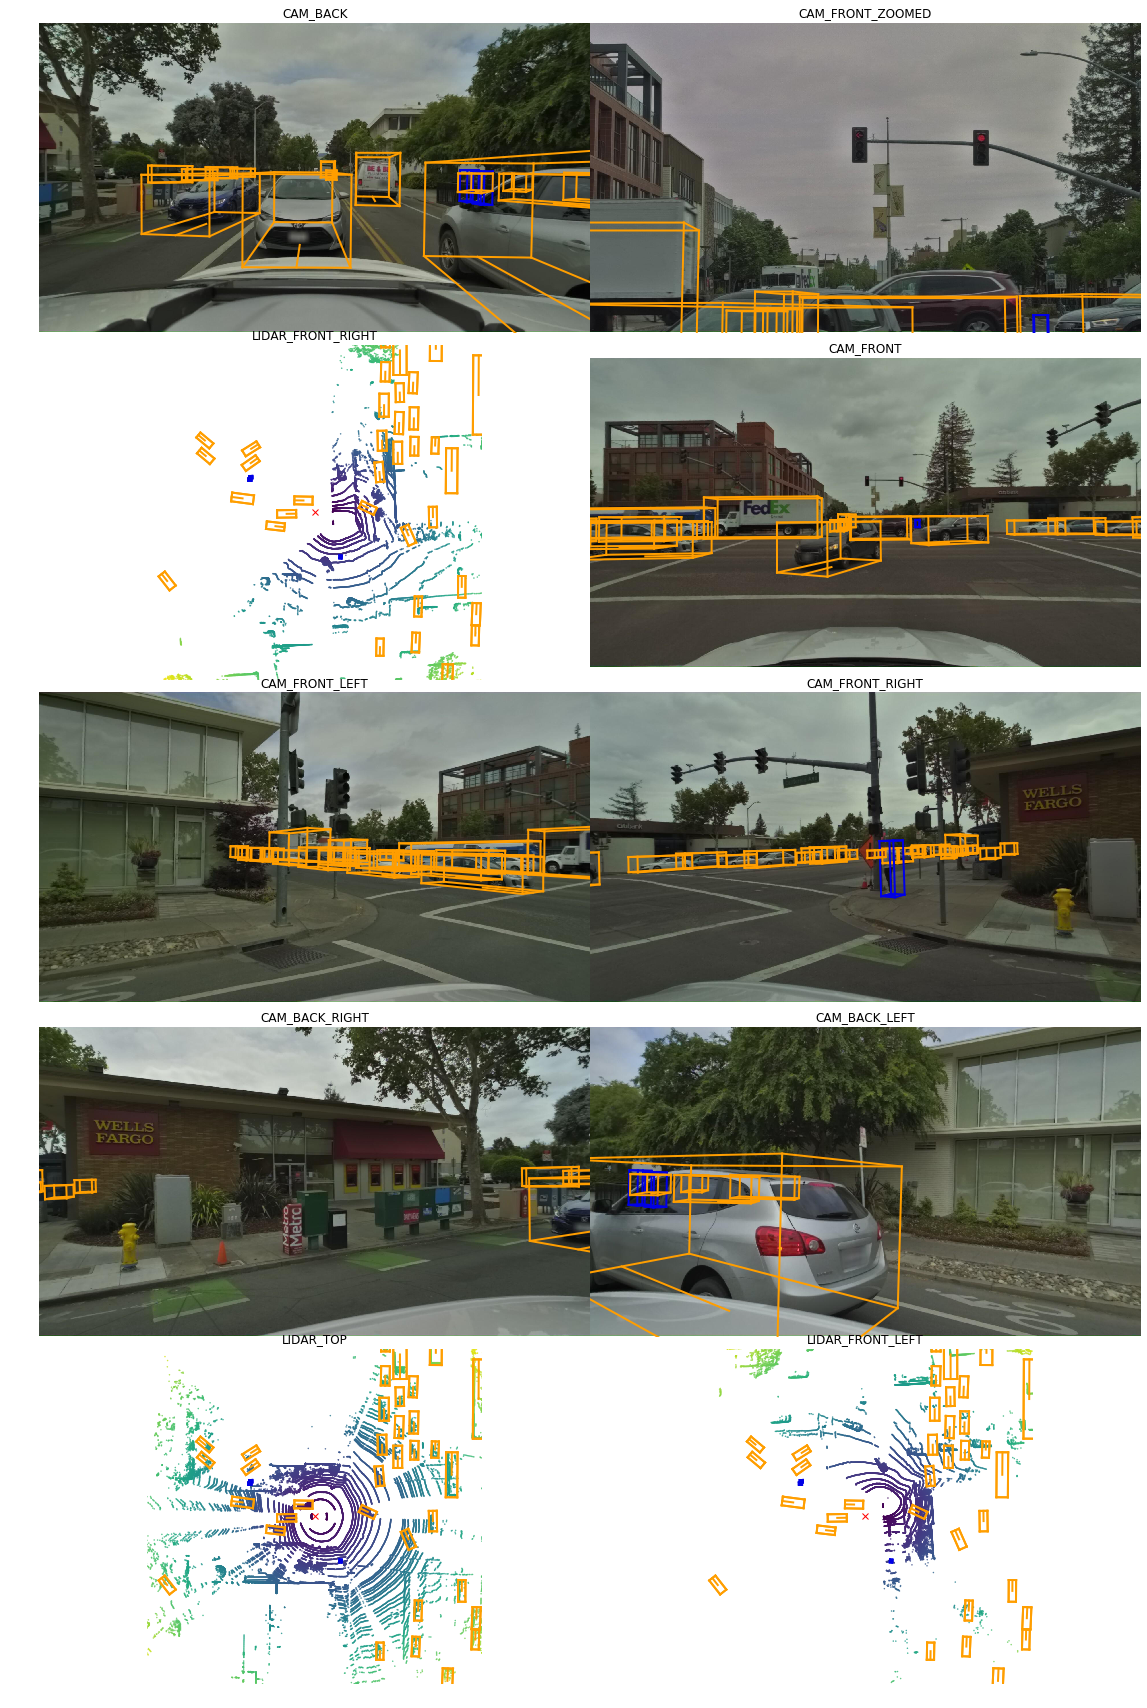

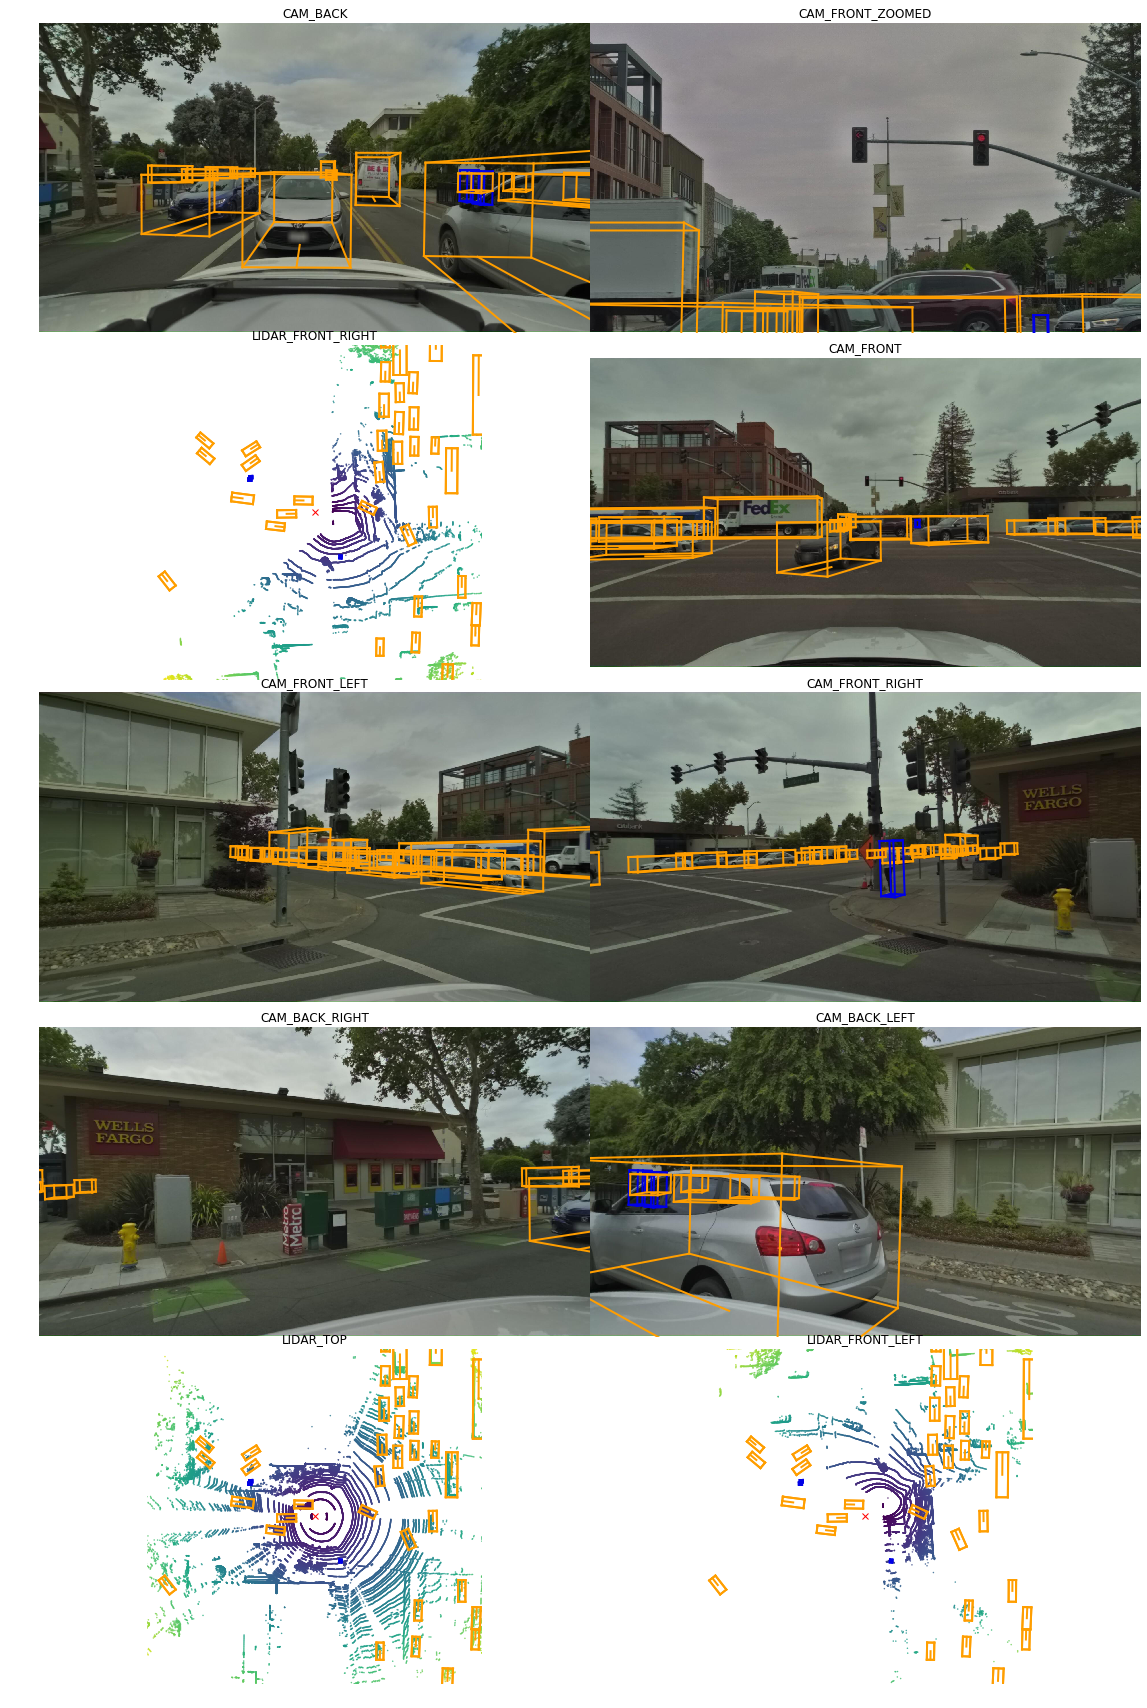

In [7]:
my_sample_token = my_scene["first_sample_token"]
# my_sample_token = level5data.get("sample", my_sample_token)["next"]  # proceed to next sample

lyftdata.render_sample(my_sample_token)

my_sample_token2 = my_scene2["first_sample_token"]
# my_sample_token = level5data.get("sample", my_sample_token)["next"]  # proceed to next sample

lyftdata.render_sample(my_sample_token)

In [8]:
my_sample = lyftdata.get('sample', my_sample_token)
my_sample
my_sample = lyftdata.get('sample', my_sample_token2)
my_sample

{'next': 'b3df76d043d6ae1438be78e75f4553cad142aedecd5a15a9f87aaa51943eea3f',
 'prev': '',
 'token': '3b30673b9d944ec6058ef5a8debb4c0a6fe075bca7076e06cf42a2bc10dc446e',
 'scene_token': '0a6839d6ee6804113bb5591ed99cc70ad883d0cff396e3aec5e76e718771b30e',
 'timestamp': 1552002683300887.5,
 'data': {'CAM_FRONT_LEFT': '2c9e25602b48edd542ff1ee4e974bf3a993ed135d34e33a4e0029ca8f312f182',
  'CAM_FRONT': '69943b7ee429998ab1c9ab55d63f1bcb8c5a4b7c2aacdfd4225fdf6ddee2a8ed',
  'CAM_FRONT_ZOOMED': 'aabfe0878fa27f0c3c449146b3cba41845acb756eb483e94de8b429c275500d8',
  'CAM_BACK_LEFT': '38855c76e82c33256523b237d6a03f0e37784709b46c762311da8ab139bfd13d',
  'CAM_BACK_RIGHT': 'c85918323a746213e215b00811618fc9bdad16ac9dab6ce4eaab9c80403b6328',
  'LIDAR_TOP': '8b8d5d3699a2a1b7c7928df3b7f5cd2b164f1449eff102f1d06d2eb832e4f3f3',
  'CAM_BACK': '672a9d700137ec105a406e81fd3b1c5df7408c05084c04470f0c103ec87a02f0',
  'CAM_FRONT_RIGHT': '3af634c7d97183d841ada8cba6300aa71c2d80ada35beba7d875dab6b0f9f12c'},
 'anns': ['ac82

In [9]:
lyftdata.list_sample(my_sample['token'])


Sample: 3b30673b9d944ec6058ef5a8debb4c0a6fe075bca7076e06cf42a2bc10dc446e

sample_data_token: 2c9e25602b48edd542ff1ee4e974bf3a993ed135d34e33a4e0029ca8f312f182, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 69943b7ee429998ab1c9ab55d63f1bcb8c5a4b7c2aacdfd4225fdf6ddee2a8ed, mod: camera, channel: CAM_FRONT
sample_data_token: aabfe0878fa27f0c3c449146b3cba41845acb756eb483e94de8b429c275500d8, mod: camera, channel: CAM_FRONT_ZOOMED
sample_data_token: 38855c76e82c33256523b237d6a03f0e37784709b46c762311da8ab139bfd13d, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: c85918323a746213e215b00811618fc9bdad16ac9dab6ce4eaab9c80403b6328, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 8b8d5d3699a2a1b7c7928df3b7f5cd2b164f1449eff102f1d06d2eb832e4f3f3, mod: lidar, channel: LIDAR_TOP
sample_data_token: 672a9d700137ec105a406e81fd3b1c5df7408c05084c04470f0c103ec87a02f0, mod: camera, channel: CAM_BACK
sample_data_token: 3af634c7d97183d841ada8cba6300aa71c2d80ada35beba7d875dab6b0f9f12c, mod

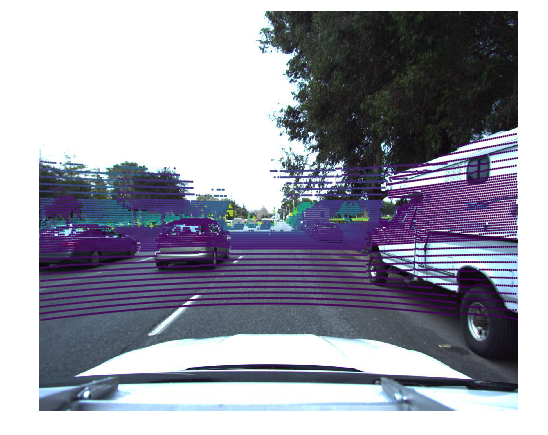

In [10]:

lyftdata.render_pointcloud_in_image(sample_token = my_sample["token"],
                                      dot_size = 1,
                                      camera_channel = 'CAM_FRONT')

In [11]:
my_sample['data']


{'CAM_FRONT_LEFT': '2c9e25602b48edd542ff1ee4e974bf3a993ed135d34e33a4e0029ca8f312f182',
 'CAM_FRONT': '69943b7ee429998ab1c9ab55d63f1bcb8c5a4b7c2aacdfd4225fdf6ddee2a8ed',
 'CAM_FRONT_ZOOMED': 'aabfe0878fa27f0c3c449146b3cba41845acb756eb483e94de8b429c275500d8',
 'CAM_BACK_LEFT': '38855c76e82c33256523b237d6a03f0e37784709b46c762311da8ab139bfd13d',
 'CAM_BACK_RIGHT': 'c85918323a746213e215b00811618fc9bdad16ac9dab6ce4eaab9c80403b6328',
 'LIDAR_TOP': '8b8d5d3699a2a1b7c7928df3b7f5cd2b164f1449eff102f1d06d2eb832e4f3f3',
 'CAM_BACK': '672a9d700137ec105a406e81fd3b1c5df7408c05084c04470f0c103ec87a02f0',
 'CAM_FRONT_RIGHT': '3af634c7d97183d841ada8cba6300aa71c2d80ada35beba7d875dab6b0f9f12c'}

In [12]:

sensor_channel = 'CAM_FRONT'  # also try this e.g. with 'LIDAR_TOP'
my_sample_data = lyftdata.get('sample_data', my_sample['data'][sensor_channel])
my_sample_data

{'width': 1224,
 'height': 1024,
 'calibrated_sensor_token': '948ca09f3809c49ffc0ed88cde36c2ac5e9826a1e1b83f051cf75fd45c3e8d3e',
 'token': '69943b7ee429998ab1c9ab55d63f1bcb8c5a4b7c2aacdfd4225fdf6ddee2a8ed',
 'sample_token': '3b30673b9d944ec6058ef5a8debb4c0a6fe075bca7076e06cf42a2bc10dc446e',
 'is_key_frame': True,
 'prev': '',
 'fileformat': 'jpeg',
 'ego_pose_token': '0294bf01d1d9d8c653c33ed2a15114cc92a4aa2a01f7f64e11fb6363eabf07a5',
 'timestamp': 1552002683250935.0,
 'next': '5f8c4a0af25ddbcb3009e7babe5d4116093c317319276d59088e88262cd588c1',
 'filename': 'images/host-a006_cam0_1236037883250935006.jpeg',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

In [14]:
anim = animate_images(scene=0, frames=100, interval=1)
HTML(anim.to_jshtml(fps=8))

NameError: name 'animate_images' is not defined

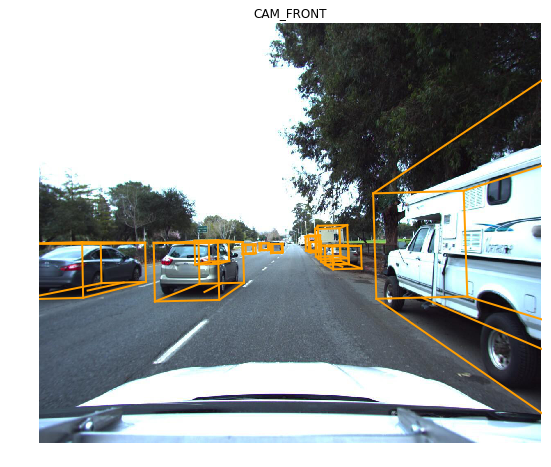

In [13]:
lyftdata.render_sample_data(my_sample_data['token'])


In [15]:
my_annotation_token = my_sample['anns'][16]
my_annotation =  my_sample_data.get('sample_annotation', my_annotation_token)
my_annotation

'93fe18c9cb690cbd3c548b40c65c6e8157eede1d18f1fba06328b8864ea28691'

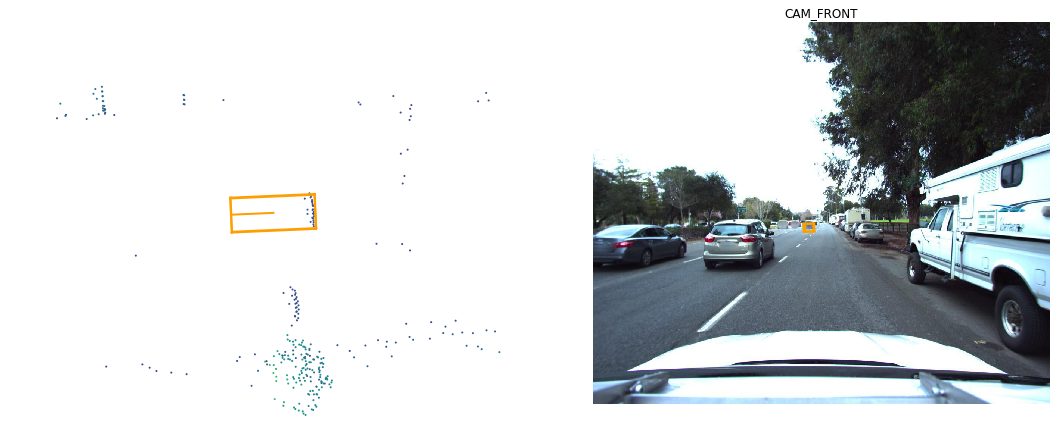

In [16]:
lyftdata.render_annotation(my_annotation_token)


First annotated sample of this instance:


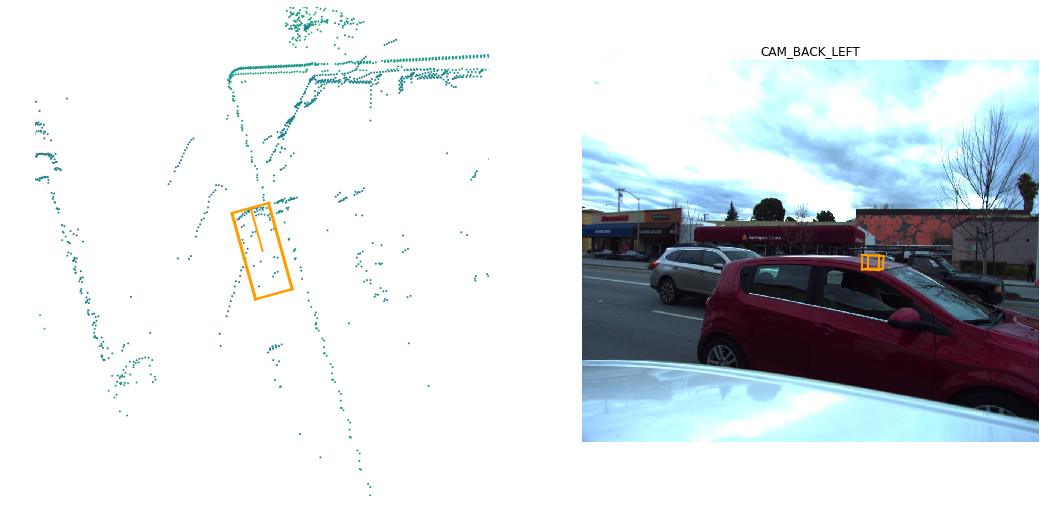

In [17]:

my_instance = lyftdata.instance[100]
my_instance
print("First annotated sample of this instance:")
lyftdata.render_annotation(my_instance['first_annotation_token'])

Last annotated sample of this instance


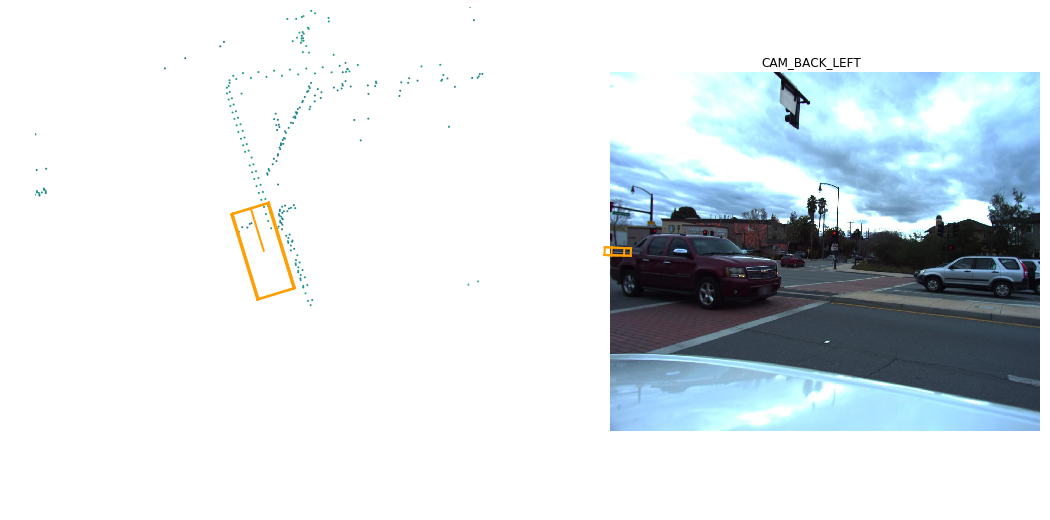

In [18]:
print("Last annotated sample of this instance")
lyftdata.render_annotation(my_instance['last_annotation_token'])

In [21]:

my_sample.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

KeyError: 10

In [19]:
lyftdata.list_categories()


Category stats
animal                      n=  186, width= 0.36±0.12, len= 0.73±0.19, height= 0.51±0.16, lw_aspect= 2.16±0.56
bicycle                     n=20928, width= 0.63±0.24, len= 1.76±0.29, height= 1.44±0.37, lw_aspect= 3.20±1.17
bus                         n= 8729, width= 2.96±0.24, len=12.34±3.41, height= 3.44±0.31, lw_aspect= 4.17±1.10
car                         n=534911, width= 1.93±0.16, len= 4.76±0.53, height= 1.72±0.24, lw_aspect= 2.47±0.22
emergency_vehicle           n=  132, width= 2.45±0.43, len= 6.52±1.44, height= 2.39±0.59, lw_aspect= 2.66±0.28
motorcycle                  n=  818, width= 0.96±0.20, len= 2.35±0.22, height= 1.59±0.16, lw_aspect= 2.53±0.50
other_vehicle               n=33376, width= 2.79±0.30, len= 8.20±1.71, height= 3.23±0.50, lw_aspect= 2.93±0.53
pedestrian                  n=24935, width= 0.77±0.14, len= 0.81±0.17, height= 1.78±0.16, lw_aspect= 1.06±0.20
truck                       n=14164, width= 2.84±0.32, len=10.24±4.09, height= 3.44±0.62, lw_asp

In [ ]:
lyftdata.category[2]
